# Academic Achievement Gap Analysis: 
## "All men are created equal"...but what about the schools?

## Introduction 

Upon graduating from university with a degree in International Relations, I joined an alternative teacher certification program called Teach for America (TFA). Why become an educator after writing a senior thesis on U.S. anti-narcotics policies in the 1980s? Because of TFA's focus on social justice. 

TFA's primary purpose is to close the "achievement gap" and end educational inequity - as it makes very clear in the "About Us" section of the TFA website: https://www.teachforamerica.org/about-us. What this means in practice is that TFA sends its teachers ("corps members") to teach in low-income schools across the country - generally where at least 80% of students at a school receive Title I funding. Such funds are provided to school districts to help support students living below the poverty line (as regulated by the "Every Student Succeeds Act").

Like most corps members, I unquestioningly accepted TFA's premise regarding the relationship between poverty and school performance. But now I would like to explore the idea in greater depth, using data from the U.S. Department of Education's EDFacts Initiative, U.S. Census Bureau's Small Area Income and Poverty Estimates Program, and the U.S. Department of Education's Local Education Agency (School District) Universe Survey Data to answer the following question: Do students living in poorer communities perform worse on end-of-year reading and math tests? 

Before I begin, a brief aside on standardized tests:

I know first-hand that test results do not provide a fully accurate picture of how a student performed. I had students who rose three or four reading levels within one school year (or even one semester). From a growth perspective, these students far outpaced their peers, who were reading near or at the correct reading level for their age. However, moving from a kindergarten to a fourth grade reading level still does not prepare one for a fifth-grade end-of-year assessment. I taught students who increased from 20% on a state exam to 50% - 150% growth! – but in the eyes of the state, still “Below Proficiency.” Other students still performed poorly on the exam although they were reading on or above grade-level, due to extenuating circumstances such as family problems, anxiety, a fight with a close friend, etc. As a former educator, I believe schools and counties should be using a growth model, rather than proficiency model, to measure students' progress. However, I can only use the resources available to me. 

I also want to briefly summarize key concepts and terms:

**Standardized Tests**
* At the end of a school year, all students take an end-of-year exam in reading and math. These tests are taken over the course of a week. Each test lasts 2-4 hours and is designed to be a review of the year's curriculum. Every state designs its own end-of-year exam, which means that test content can vary widely from state to state. 
* Students can score "Below Basic," "Basic," "Proficient," or "Advanced" on the end-of-year tests. Only "Proficient" and "Advanced" students are considered ready to enter the next grade. To make my analysis easier to read, I will use the terms "passing" and "passed" when referring to these students. 
* Each state determines its own proficiency level, which changes each year. This means that a student in Tennessee could score 72% on his/her math test and be considered "Proficient", but a student in Illinois who also scores 72% could be considered "Basic" (which means this student is not ready for the next grade). Additionally, a student in Tennessee who takes the math test in 2012 and scores a 72% could be considered "Proficient," but a student in Tennessee who takes the math test in 2013 and scores a 72% could be considered "Basic." 

**Poverty Level**
* I concentrate on the percentage of children, aged 5 to 17, who are living in families in poverty. I focus on this data point because this is what the Census Bureau uses when determining "Title 1 Funding" for school districts. 
* "Title 1 Funding" is part of the Elementary and Secondary Education Act. It is a type of grant provided by the U.S. Department of Education to school districts with high percentages of children from low-income families. 
* A family is considered to be in poverty when the total family income is less than the poverty threshold, which varies by the size of the family and the age of the family members. In 2011, the poverty threshold for a family of three with one child (under the age of 18) was an average of 18,106 USD. If that family had two children, the poverty threshold was 18,123 USD. The poverty threshold for a family of four with one child was 23,581 USD. In 2012, the threshold for a family of three with one child increased to 18,480 USD and 24,069 USD for a family of four with one child. 

**School Districts and Counties**
* Sometimes, more than one school district exists within a county. Special school districts, such as those for severely disabled students, can span over several counties. 
* When distributing Title 1 Funding, the Census Bureau creates a subset of "regular school districts." A "regular" school district is one that is geographically defined. 

In [1]:
%matplotlib inline

In [2]:
#import all needed packages
import pandas as pd
import csv as csv
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import scipy

## Data Sources

- __District-Level Math Assessments (2011-2012 School Year):__https://catalog.data.gov/dataset/consolidated-state-performance-report-201112/resource/4da8f9de-d265-4e2f-b321-f180052df3f7
- __District-Level Reading Assessments (2011-2012 School Year):__https://catalog.data.gov/dataset/consolidated-state-performance-report-201112/resource/fd3382ec-8a1d-4372-930c-0e4f72db5037
- __Poverty Rates Per County (2011):__https://www.census.gov/data/datasets/2011/demo/saipe/2011-state-and-county.html
- __Poverty Rates Per County (2012):__https://www.census.gov/data/datasets/2012/demo/saipe/2012-state-and-county.html
- __School Districts (2011-2012 School Year):__https://nces.ed.gov/ccd/pubagency.asp

(To see my data cleaning, wrangling and transformation, click <a href="https://nbviewer.jupyter.org/gist/TGasinski/07610477aee76f46714b59acb79736b5">here</a>.)

In [3]:
#load cleaned dataset 

df_final = pd.read_csv(r"C:\Users\t_gas\df_final.csv")

## Analysis

The .describe() function provides a helpful (but basic) statistical overview of the final data set.

In [4]:
df_final.describe()

,Unnamed: 0,LEAID,ALL_MTH00pctprof_1112,ALL_RLA00pctprof_1112,Ages 5 to 17 in Families in Poverty Percent
count,12433.000000,1.243300e+04,12433.000000,12433.000000,12433.000000
mean,8188.880721,2.962784e+06,67.984396,71.037360,20.596043
std,4600.497492,1.477330e+06,17.826175,16.385147,8.050675
min,1.000000,1.000050e+05,4.000000,6.000000,3.450000
25%,4167.000000,1.803700e+06,55.000000,60.000000,14.750000
50%,8136.000000,3.008860e+06,72.000000,74.000000,19.900000
75%,12264.000000,4.027750e+06,82.000000,84.000000,25.700000
max,16060.000000,5.606240e+06,99.000000,99.000000,57.950000


From the table above, I can see that an average of 68.0% of students across the U.S. scored proficient or above on their end-of-year math exams. Students performed slightly better in reading, with an average of 71.0% of students scoring proficient or above in reading. I also learn that the average percentage of children living below the poverty line in each county is 20.6%. 

The standard deviation (std) alone is not very useful, but I can use it to calculate the coefficient of variation (= std / mean) for students' performance in math and reading. 

In [5]:
#calculate coefficient of variation for math scores
Math_Coefficient = 17.83/68
print("Math Coefficient: {}".format(Math_Coefficient))

Math Coefficient: 0.2622058823529412


In [6]:
#calculate coefficient of variation for reading scores
Reading_Coefficient = 16.39/71.04
print("Reading Coefficient: {}".format(Reading_Coefficient))

Reading Coefficient: 0.23071509009009009


In [7]:
#calculate coefficient of variation for poverty levels
Poverty_Coefficient = 8.05/20.60
print("Poverty Coefficient: {}".format(Poverty_Coefficient))

Poverty Coefficient: 0.3907766990291262


As all of the coefficients are significantly less than 1, my data does not appear to be too spread out. However, graphing the data will help give me a better understanding of the distribution of the data set. 

Normally, Exploratory Data Analysis (EDA) begins with a histogram to examine the distribution of data. Because I have an explicit hypothesis in mind, I will use a scatterplot to visualize the relationship between two specific variables (in this case: test scores and poverty levels for each county) and calculate both the Pearson correlation coefficient and the p-value. 

If I had more variables to compare, a pairplot would also be a useful place to begin. 

C:\Users\t_gas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


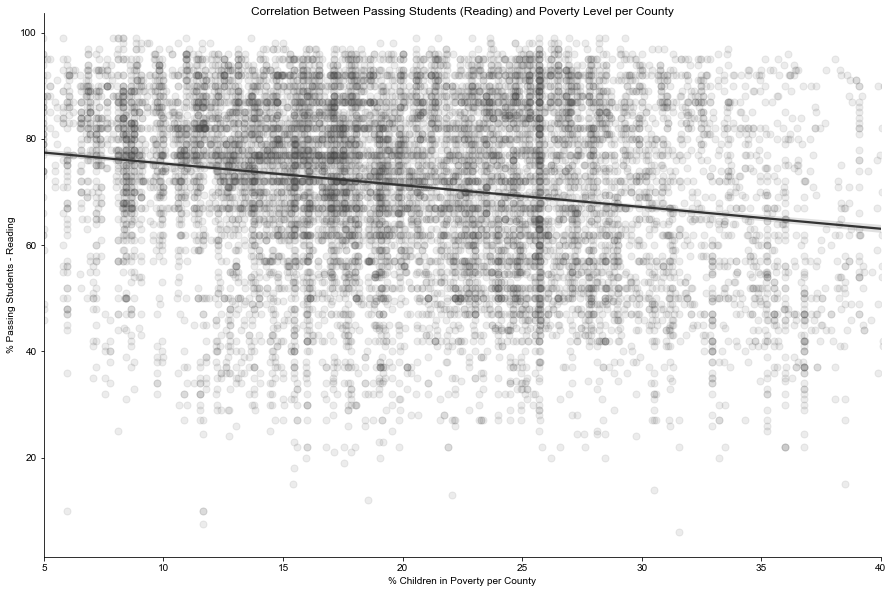

In [8]:
#scatterplot to compare percentage of passing students in reading with poverty levels per county
plt.subplots(figsize=(15,10))
sns.regplot(x="Ages 5 to 17 in Families in Poverty Percent", y="ALL_RLA00pctprof_1112", data=df_final, marker='o', color='.2', scatter_kws={"color":".3","alpha":0.1, 's':50})
plt.xlabel('% Children in Poverty per County')
#set limits to the x-axis in order to remove outliers
plt.xlim(5, 40) 
plt.ylabel('% Passing Students - Reading')
plt.title('Correlation Between Passing Students (Reading) and Poverty Level per County', horizontalalignment='center', verticalalignment='top')
sns.despine(right=True)
sns.set_style("whitegrid")
plt.show()

In [9]:
#calculate Pearson's coefficient and p-value for percentage of passing students in reading with poverty levels per county
print("Pearson's coefficient and p-value for Reading: {}".format(scipy.stats.pearsonr(df_final["Ages 5 to 17 in Families in Poverty Percent"], df_final["ALL_RLA00pctprof_1112"])))

Pearson's coefficient and p-value for Reading: (-0.201251838162841, 8.794375689754975e-114)


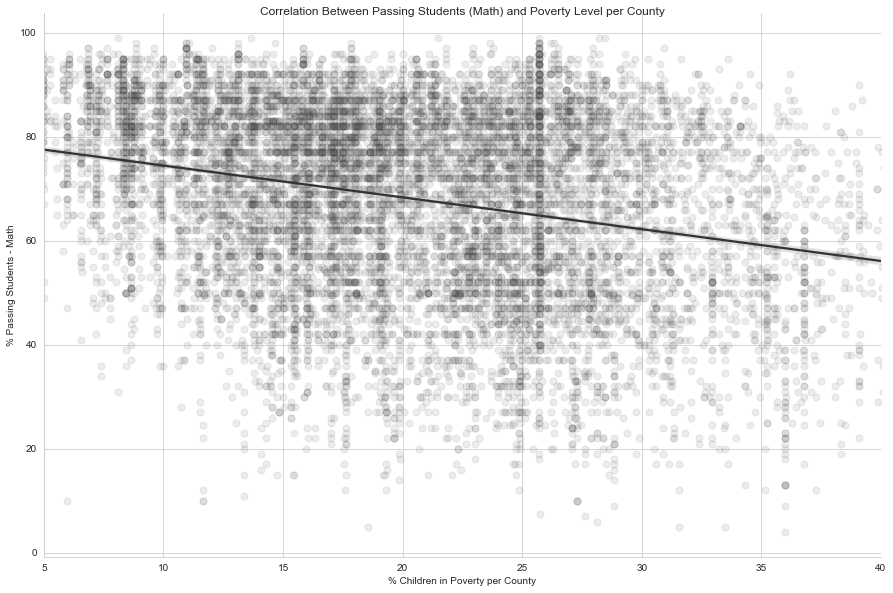

In [10]:
#scatterplot to compare percentage of passing students in math with poverty levels per county
plt.subplots(figsize=(15,10))
sns.regplot(x="Ages 5 to 17 in Families in Poverty Percent", y="ALL_MTH00pctprof_1112", data=df_final, marker='o', color='.2', scatter_kws={"color":".3","alpha":0.1, 's':50})
plt.xlabel('% Children in Poverty per County')

#set limits to the x-axis in order to remove outliers
plt.xlim(5, 40) 
plt.ylabel('% Passing Students - Math')
plt.title('Correlation Between Passing Students (Math) and Poverty Level per County', horizontalalignment='center', verticalalignment='top')
sns.despine(right=True)
sns.set_style("whitegrid")
plt.show()

In [11]:
#calculate Pearson's coefficient and p-value for percentage of passing students in math with poverty levels per county
print("Pearson's coefficient and p-value for Math: {}".format(scipy.stats.pearsonr(df_final["Ages 5 to 17 in Families in Poverty Percent"], df_final["ALL_MTH00pctprof_1112"])))

Pearson's coefficient and p-value for Math: (-0.2762017469024384, 1.6121912759056403e-216)


The Pearson's coefficient for reading test scores and poverty level is -.20. For math test scores and poverty level, it is slightly higher (-.28). This tells me that there is a weak negative linear relationship between test scores and poverty levels. Additionally, the p-value for reading is 8.79e-114 and for math is 1.61e-216. The small p-values (under .05) indicate that there is strong evidence against the nully hypothesis and I can safely reject it. This means that there is a correlation between percentage of passing students and poverty level. 

A boxplot can help me better understand the distribution of my data. Because my dataframe is currently divided into thousands of counties, I will need to first categorize my data. Otherwise, the boxplot will not be readable.

I will classify my data by modifying the Economic Research Service department's method, which separates poverty levels into five groups: "Up to 10%", "10 up to 20%", "20 to 25%", "25 to 30%", "30 to 50%", "50% or higher". I will combine "20 to 25%" and "25 to 30%", so that the levels are standardized (each increasing by 10%). 

Sources: https://www.ers.usda.gov/topics/rural-economy-population/rural-poverty-well-being/child-poverty/

In [12]:
#create a function to categorize data and then run function to add data to new column in dataframe

def conditions(x):
    if x >= 50:
        return "50% or Above"
    elif x >= 30:
        return "30% - 49.9%"
    elif x >= 20:
        return "20% - 29.9%"
    elif x >= 10:
        return "10% - 19.9%"
    else:
        return "Up to 10%"

func = np.vectorize(conditions)
poverty_levels = func(df_final["Ages 5 to 17 in Families in Poverty Percent"])
df_final["Poverty Levels"] = poverty_levels

Now I can plot two new boxplots.

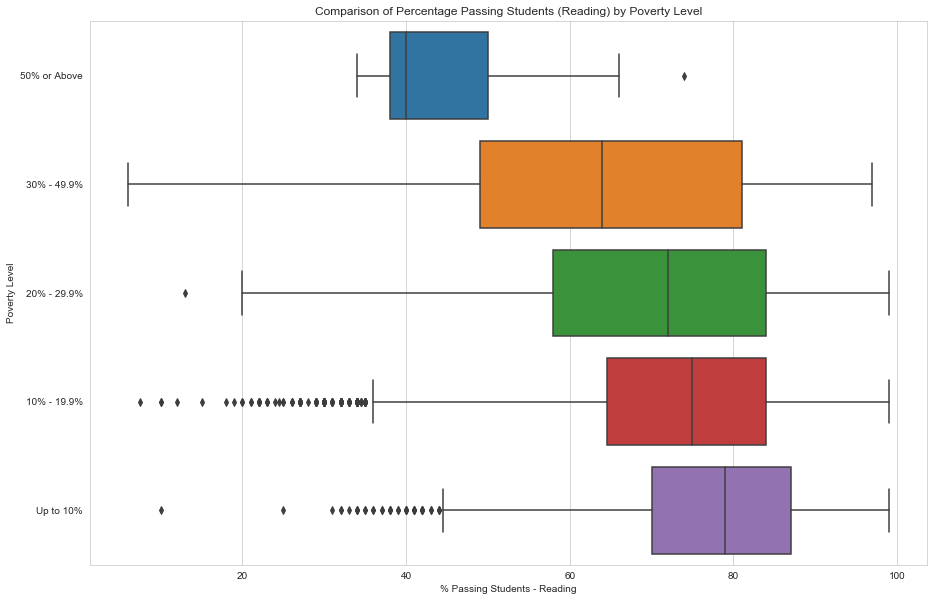

In [13]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(y='Poverty Levels', x = 'ALL_RLA00pctprof_1112', data = df_final, order = ["50% or Above", "30% - 49.9%", "20% - 29.9%", "10% - 19.9%", "Up to 10%"])
plt.xlabel('% Passing Students - Reading')
plt.ylabel('Poverty Level')
plt.title('Comparison of Percentage Passing Students (Reading) by Poverty Level')
sns.set_style("whitegrid")
plt.show()

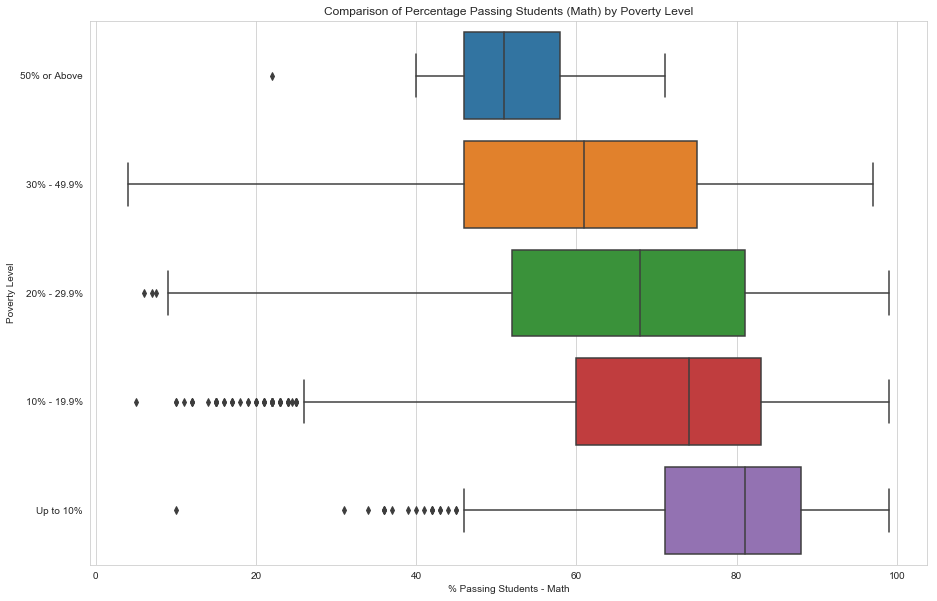

In [14]:
fig, ax = plt.subplots(figsize=(15,10))

sns.boxplot(y='Poverty Levels', x = 'ALL_MTH00pctprof_1112', data = df_final, order = ["50% or Above", "30% - 49.9%", "20% - 29.9%", "10% - 19.9%", "Up to 10%"])
plt.xlabel('% Passing Students - Math')
plt.ylabel('Poverty Level')
plt.title('Comparison of Percentage Passing Students (Math) by Poverty Level')
sns.set_style("whitegrid")
plt.show()

In both graphs, almost all the boxes overlap and the medians steadily decline as the poverty level increases (with the exception of the poverty levels 20-24% and 25-29.9%, whose medians are equal). This means that, on average, schools perform worse on end-of-year reading and math exams if they live in counties with higher poverty rates, confirming the negative linear relationship that was observed in the jointplot graph above. 

The boxes themselves become longer as the poverty level increases, indicating a greater interquartile range. This tells me that the median itself may not be very reliable. Additionally, given the steadily increasing length of the "whiskers" for higher poverty levels, I can interpret that the scores vary more widely for schools in those counties. This means that they are less likely to consistently perform well on end-of-year reading exams, compared to their better-off peers. 

The most significant difference between the reading and math boxplots is for the 50% or above poverty level - the median percent of students who scored proficient or advanced on the end-of-year exam was approximately 50% for math and 40% for reading. 

I can create boolean variables for particular poverty levels, in order to retrieve the actual numbers visualized in the boxplot above. 

In [15]:
#create boolean variable
Up_to_ten = df_final["Poverty Levels"] == "Up to 10%"

#select all cases where the above criteria are true and apply the .describe() method
df_final[Up_to_ten].describe()

,Unnamed: 0,LEAID,ALL_MTH00pctprof_1112,ALL_RLA00pctprof_1112,Ages 5 to 17 in Families in Poverty Percent
count,1164.000000,1.164000e+03,1164.000000,1164.000000,1164.000000
mean,8617.365120,3.143481e+06,78.115120,76.742268,7.851847
std,3741.339172,1.210199e+06,12.925146,13.710311,1.493527
min,149.000000,2.000300e+05,10.000000,10.000000,3.450000
25%,5764.750000,2.507492e+06,71.000000,70.000000,6.950000
50%,9208.500000,3.409090e+06,81.000000,79.000000,8.300000
75%,10414.000000,3.627360e+06,88.000000,87.000000,8.750000
max,16047.000000,5.604860e+06,99.000000,99.000000,9.950000


In [16]:
#create second boolean variable
Slightly_above_average = df_final["Poverty Levels"] == "20% - 29.9%"

#select all cases where the above criteria are true and apply the .describe() method
df_final[Slightly_above_average].describe()

,Unnamed: 0,LEAID,ALL_MTH00pctprof_1112,ALL_RLA00pctprof_1112,Ages 5 to 17 in Families in Poverty Percent
count,4738.000000,4.738000e+03,4738.000000,4738.000000,4738.000000
mean,8242.182778,2.962482e+06,65.806353,70.363867,24.747098
std,4797.315341,1.531737e+06,18.307437,16.297987,2.595430
min,3.000000,1.000070e+05,6.000000,13.000000,20.000000
25%,3721.500000,1.729122e+06,52.000000,58.000000,22.700000
50%,8181.500000,3.012030e+06,68.000000,72.000000,24.800000
75%,12392.500000,4.101450e+06,81.000000,84.000000,26.800000
max,16010.000000,5.517160e+06,99.000000,99.000000,29.950000


Now I can see that if you live in a county with under 10% poverty, your child has a much better chance of being adequately prepared for the next grade. In these counties, an average of 76% of students pass their reading tests and 78% of students pass their math tests. 

If, however, you live in a county with a slightly above-average poverty level (between 20% and 29.9% poverty), an average of only 72% of students pass their reading tests and 68% of students pass their math tests. 

Even if your richer county performs worse than its peers, your child is still more likely to be better prepared for the next grade than children in poorer counties. Within the lower quartile of counties that have under 10% poverty, 70% pass their reading tests and 71% of students pass their math tests. Compare this to the lower quartile of counties with 20%-29.9% poverty, where 58% pass their reading tests and 52% of students pass their math test and 58% pass their reading tests.

Because boxplots summarize the distribution of a numeric variable (in this case - percentage of passing students), information about the distribution and total number of observations is lost. To visualize the distribution of scores, I will combine a swarmplot with a violin plot. 

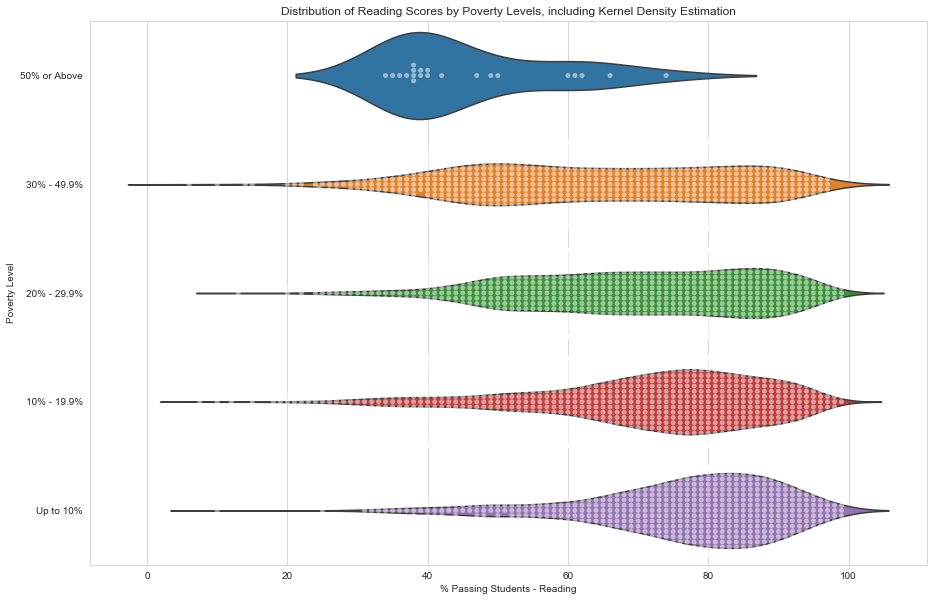

In [17]:
fig, ax = plt.subplots(figsize=(15,10))

sns.violinplot(y='Poverty Levels', x = 'ALL_RLA00pctprof_1112', data = df_final, order = ["50% or Above", "30% - 49.9%", "20% - 29.9%", "10% - 19.9%", "Up to 10%"], inner=None)
sns.swarmplot(y ='Poverty Levels', x = 'ALL_RLA00pctprof_1112', data = df_final, order = ["50% or Above", "30% - 49.9%", "20% - 29.9%", "10% - 19.9%", "Up to 10%"], color="w", alpha=.5);
plt.xlabel('% Passing Students - Reading')
plt.ylabel('Poverty Level')
plt.title('Distribution of Reading Scores by Poverty Levels, including Kernel Density Estimation')
plt.show()

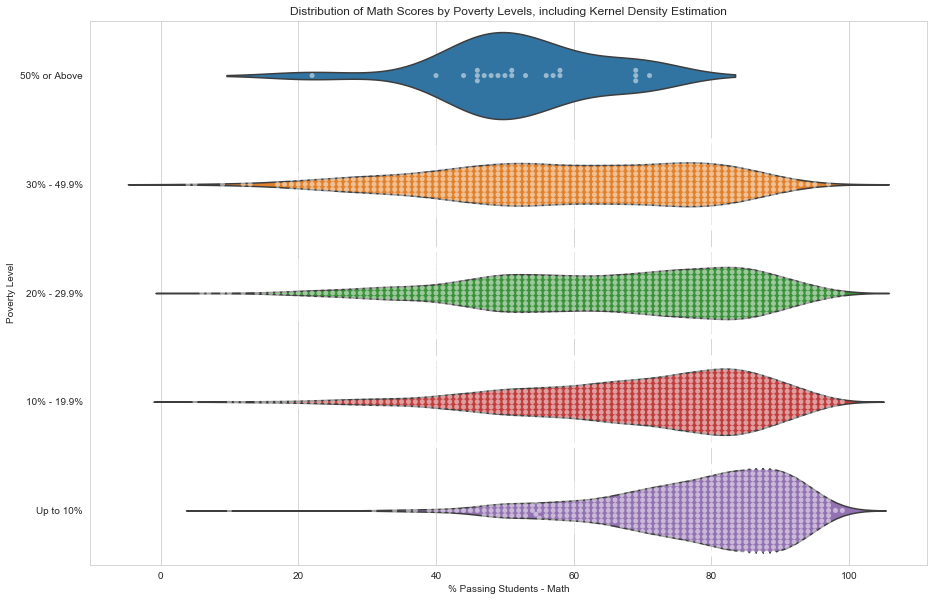

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

sns.violinplot(y ='Poverty Levels', x = 'ALL_MTH00pctprof_1112', data = df_final, order = ["50% or Above", "30% - 49.9%", "20% - 29.9%", "10% - 19.9%", "Up to 10%"], inner=None)
sns.swarmplot(y ='Poverty Levels', x = 'ALL_MTH00pctprof_1112', data = df_final, order = ["50% or Above", "30% - 49.9%", "20% - 29.9%", "10% - 19.9%", "Up to 10%"], color="w", alpha=.5);
plt.xlabel('% Passing Students - Math')
plt.ylabel('Poverty Level')
plt.title('Distribution of Math Scores by Poverty Levels, including Kernel Density Estimation')
plt.show()

For counties with 0% - 19.9% poverty, there is a unimodal distribution of students who scored proficient or advanced on their reading and math tests. This means that in lower-poverty counties, it is most common that at least 75% of students are prepared for the next grade in reading and 80% of students are prepared for the next grade in math. 

Once the poverty level increases, however, the distribution of proficient and advanced students becomes more and more uniform. A county with a 26% poverty level could have 80% of its students pass their reading tests, but it is almost equally likely that only 40% of its students pass. 

Counties in extreme poverty (over 50%) also have a clearly unimodal distribution. However, it is clear from the graphs that there are far fewer observations for schools in these counties. As such, I do not think it is fair to draw any conclusions from this group of counties. It is worth nothing, however, that in the best-performing county, 74% of students passed their reading tests and 71% passed their math tests. 

In [19]:
#create third boolean variable
Extreme_poverty = df_final["Poverty Levels"] == "50% or Above"

#select all cases where the above criteria are true and apply the .describe() method
df_final[Extreme_poverty].describe()

,Unnamed: 0,LEAID,ALL_MTH00pctprof_1112,ALL_RLA00pctprof_1112,Ages 5 to 17 in Families in Poverty Percent
count,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,6129.714286,2.383744e+06,52.380952,45.857143,52.514286
std,2300.319503,8.167488e+05,11.425744,11.778309,2.183182
min,864.000000,5.027300e+05,22.000000,34.000000,50.050000
25%,5278.000000,2.201050e+06,46.000000,38.000000,51.400000
50%,7323.000000,2.801360e+06,51.000000,40.000000,52.350000
75%,7347.000000,2.802040e+06,58.000000,50.000000,52.600000
max,7434.000000,2.804680e+06,71.000000,74.000000,57.950000


(99% of students in the best-performing counties within both "Up to 10%" and "20%-29.9%" poverty level categories passed their reading and math tests.)

## Final Conclusions

I began this project with one question in mind: Do students living in poorer communities perform worse on end-of-year reading and math tests? 

What my results show is not that students from poorer counties *always* perform worse than their richer peers - as all plots show, many poorer counties perform equal to, if not better than, richer counties. However, a typical county with a poverty rate of 20% to 29.9% is statistically likely to perform worse than a typical county with a poverty rate of 10% to 19.9%. 

The U.S. was founded on the belief that all people are created equal. In his 2008 Inaugural Address, President Obama echoed the Declaration of Independence when he said: "The time has come to reaffirm our enduring spirit; to choose our better history; to carry forward that precious gift, that noble idea passed on from generation to generation:  the God-given promise that all are equal, all are free, and all deserve a chance to pursue their full measure of happiness."

But as my analysis shows, the U.S. does not always live up to its promise. No matter how long a student spends studying or how long a teacher spends tutoring, certain students in certain communities are less likely to succeed academically. 

Now the question becomes: What are we going to do about it? 

In [20]:
%%html
<script src="https://cdn.rawgit.com/parente/4c3e6936d0d7a46fd071/raw/65b816fb9bdd3c28b4ddf3af602bfd6015486383/code_toggle.js"></script>